## **Solutions parallèles pour la résolution des systèmes d'équations linéaires par inversion de matrice (méthode d'élimination de Gauss-Jordan)**

-**Réalisé par :** 
> - *Lamdani Wilem (2CS SIQ3)*
> - *Belkessa Linda (2CS SIQ3)*

- **Encadré par :**
> - *Mme. Haichour Salima*

- Lien drive vers les fichiers nécessaires : https://drive.google.com/drive/folders/1pZKfEIO-IZTV1Qs1S6V-V5f_y1Ca5PAR?usp=sharing



### **Introduction :**
Plusieurs API qui prennent en charge les différents paradigmes de progrmmation ont été utilisées pour accélérer les calculs et l'exécutions des algorithmes de nature scientifique, il s'agit des bibliothèques Pthreads, openMP et MPI. Cependant, les limites de cette technique de parallèlisation sont celles du CPU lui-meme, de nos jours les calculs intenses et hautement parallèlisés sont faits sur des GPU.

La nature massivement parallèle des GPU les rend capables de produire des taux de GFlops théoriquement beaucoup plus élevés que les processeurs de pointe actuels.

les performances augmentent également beaucoup plus rapidement que les performances du processeur en raison de parallélisme explicite. La quantité de puissance de calcul à récolter a également attiré la communauté du calcul haute performance (HPC), et nous avons vu de nombreuses applications scientifiques mises en œuvre avec succès avec des gains de performances significatifs sur le GPU.

<img src="https://www.researchgate.net/profile/Mohamed_Meselhi/publication/323281068/figure/fig1/AS:727952463495175@1550568800252/CPU-vs-GPU-architecture-each-blue-square-represents-one-core.ppm" width="500" height="300" />

*Figure 1 : Comparaison des architectures CPU et GPU*

### **Détails hardware des ressources GPU et CPU de colab :**

In [5]:
## Ressources GPU
!nvidia-smi

Sat Feb  5 02:46:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
## Ressources CPU 
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

### **Présentation du problème choisi :**
L'élimination de Gauss-Jordan peut résoudre un système d'équations AX = B, où A est une matrice n × m de rang r, B est un vecteur fixé, et X le vecteur inconnu. On crée un tableau à n lignes et m + 1 colonnes en bordant la matrice A par le vecteur B. On réduit la matrice sous forme échelonnée réduite.

Si les pivots de la matrice échelonnée réduite associée à (A|B) sont situés uniquement dans les m premières colonnes (ce qui est toujours le cas si r = n ) et ont pour indice de colonnes k1, …, kr , alors la dernière colonne fournit une solution particulière, obtenue en prenant tous ses termes nuls sauf ceux situés à la ligne d'indice ki et à qui on donne la valeur du terme situé à la ligne i de la dernière colonne, i variant de 1 à r.

On obtient la solution générale du système en ajoutant à cette solution particulière un élément quelconque du noyau de A. Celle-ci s'obtient en donnant des valeurs quelconques aux coefficients de X situés à un indice de ligne autre que les ki, et en déterminant les coefficients situés aux lignes d'indice ki de façon à satisfaire le système (ce qui est facile compte tenu de la forme échelonnée de la matrice).

Si le dernier pivot de la matrice échelonnée réduite associée à (A|B) se situe dans la dernière colonne, alors il n'y a pas de solution.

Si la matrice A est carrée inversible (autrement dit, le système est de Cramer), alors on obtient dans la dernière colonne l'unique solution X du système.

Variante : dans l'algorithme précédent, si on se borne à obtenir une matrice échelonnée (non réduite), on obtient une matrice triangulaire supérieure. Il ne reste plus qu'à « remonter » pour retrouver les valeurs des coefficients de X.

**Compléxité algorithmique = O(n^3)**

### **Présentation de l'algorithme d'élimination Gauss-Jordan :**
> L'élimination Gauss-Jordan vise à transformer un système d'équations linéaires en une matrice triangulaire supérieure afin de résoudre les inconnues et d'en déduire une solution. Une colonne pivot est utilisée pour réduire les lignes qui la précèdent ; puis après la transformation, la back-substitution est appliquée.

> ![image1](https://i.ibb.co/XxfnZVH/gelim-cuda-1.png)

> **Procédure :**

> (1) Pour effectuer une élimination gaussienne en commençant par le système d'équations :
![image2](https://media.cheggcdn.com/study/e2c/e2c66011-05e7-4974-baf9-29eb251a44aa/DC-1723V1.png)

> (2) Composer la matrice augmentée 

>![image3](https://media.cheggcdn.com/study/1f2/1f287abc-807e-4412-86f7-9db40d587115/DC-1723V2.png)

> (3) Mettre la matrice augmentée sous forme de matrice triangulaire supérieure 

> ![image3](https://media.cheggcdn.com/study/cae/cae5db46-d3b6-4909-8764-185a6398c5c3/DC-1723V3.png)

> (4) Résooudre l'équation de la ième ligne pour , puis remettez-la dans l'équation de la (k-1)ère ligne pour
obtenir une solution pour Xk-1, etc., selon la formule

>![Formule](https://i.ibb.co/FYnhh9W/image-2022-02-03-230208.png)


### **Implémentation séquentielle :**
- **Principe :**    
***
```C
Loop 1 : for (norm = 0; norm < N - 1; norm++) {
            Loop 2 : for (row = norm + 1; row < N; row++) {
                                     multiplier = A[row][norm] / A[norm][norm];
                      Loop 3 : for (col = norm; col < N; col++) {
                                            A[row][col] -= A[norm][col] * multiplier;
                                     }
                                     B[row] -= B[norm] * multiplier;
                           }
                }

```
***



In [7]:
## Colab efface les fichiers à chaque recyclage de session, uploader les s'ils ne figurent pas !
!gcc sequentiel.c -o sequentiel

###**Vérification du bon fonctionnement du code :**
> On déroule le code sur une petite matrice et on compare la solution obtenue X à un outil en ligne https://www.math10.com/scripts/matrices/determinant-matrix-calculators.html

In [8]:
!./sequentiel 3 2


Dimension de la matrice N = 3. Seed (germe) = 2 .

Initialisation...

A =
	45939.19, 22826.63, 38501.24;
	53062.95, 27653.70, 42137.44;
	5819.30, 45862.45, 64920.18;
	
B = [7961.26; 4350.56; 19380.19]
Execution sequentielle ... .

X = [-0.23; -1.40;  1.31]

Temps d'exécution Séquentiel = 0.006 ms.


![solve1](https://i.ibb.co/p2cSkgR/image-2022-02-05-033619.png)

*Solution de l'outil en ligne*

### **Test de gain en performance :**
**Remarque :** Les temps d'exécution sur colab sont aussi liés à la vitesse de connexion internet, veuillez utiliser un environnement d'exécution locale.


In [9]:
## syntaxe générale d'exécution : '!./sequentiel <Taille de la matrice> <Seed aléatoire pour générer au hasard les valeurs>'
!./sequentiel 1000 2


Dimension de la matrice N = 1000. Seed (germe) = 2 .

Initialisation...
Execution sequentielle ... .

Temps d'exécution Séquentiel = 1270.21 ms.


### **Méthodologie de parallèlisation avec openMP :**
Pour pouvoir bien utiliser openMP, il faut dans un premier temps répondre aux questions suivantes :    
1- Quelles sont les boucles parallèlisable ? 
> - Les boucles dont le nombre d'itérations est connu dès le départ et qui ne change pas
> - Les boucles où chaque itération est indépendante des autres
> - Les boucles qui ne contiennet pas une dépendence de données (avec les boucles externes en général)

Observons d'abord comment s'effectue l'élimination de Gauss-Jordan visuellement, 4 scénarios sont possibles:      
> ![gauss-jordan viz](https://i.ibb.co/3TbRjb3/Gaussian-Elimination-1.png)

- La boucle i est représentée par la ligne et la colonne jaunes. Les entrées dans la ligne et la colonne jaunes sont utilisées pour mettre à jour la sous-matrice verte avant de passer à la ligne/colonne i+1, ce qui signifie que les valeurs des entrées dans la (i+1)ère zone jaune dépendent des opérations effectuées sur eux aux valeurs précédentes de i. Par conséquent, nous ne pouvons pas utiliser OpenMP pour paralléliser cette boucle en raison de la dépendance des données.

- La boucle j a un nombre d'itérations qui varie avec i, mais nous connaissons le nombre d'itérations à chaque fois que nous sommes sur le point d'entrer dans la boucle. Aucune des itérations ultérieures ne dépend des précédentes et les itérations peuvent être calculées dans n'importe quel ordre ! La boucle j est donc parallélisable.

- La boucle k, comme la boucle j, a un nombre d'itérations qui varie mais qui est calculable pour chaque i. Aucune des itérations ultérieures ne dépend des précédentes, et elles peuvent toutes être calculées dans n'importe quel ordre. Par conséquent, la boucle k est également parallélisable.

> __*Conclusion :*__ Il est préférable de sélectionner la boucle externe (j), car nous aurons alors plus de parallélisme ininterrompu et moins de fork et de join.




### **Implémentation du code avec openMP:**     
> 1. La boucle externe (Loop 1) ne peut pas etre parallèlisée car elle contient une variable liée au controle de la boucle interne (Loop 2)

> 2. La boucle interne (Loop 2) nne contient aucune dépendence de donnée d'où elle est parallèlisable

> 3. La matrice A, le vecteur B et l'index de la boucle externe 'norm' et N seront partagées (shared).

> 4. Idée globale : Durant la première itération de la boucle externe (Loop 1), on initialise toutes les entrées dans column[0] en commençant de row[1]. 
Dand la boucle interne (Loop 2) chaque thread s'occupe d'additionner une ligne un multiple (par un scalaire) d'une autre ligne à fin d'avoir 0. à la sortie de la boucle interne, la boucle externe passe à la prochaine colonne, il s'agit ici de l'échelonnement par colonnes. Puis, on effectue une opération de backsubstitution pour résoudre l'équation.

> #### **Remarque importante:** 
> Google Colab n'offre dans cette version gratuite que 2 processeurs chacun avec 1 core, ce qui n'est pas suffisant pour comparer l'exécution séquentielle et parallèle, il est souhaitable d'exécuter le code openMP avec des ressources locaux.

Pour dérouler le code openMP/Séqueniel localement, on peut utiliser un environnement d'exécution locale pour exploiter les coeurs CPU de la machine, pour celà :
> - Dans le dossier drice, télécharger 'sequentiel.c' et 'openMP.c' et 'notebook_openMP.ipynb'.
- Installer jupyter notebook localement `pip install notebook`
- Lancer un notebook local `jupyter notebook`
- Téléverser les fichiers téléchargés dans le répértoire local et lancer l'exécution.
- Ou utiliser un IDE (avec compilateur gcc)

In [10]:
## Colab efface les fichiers à chaque recyclage de session, uploader les s'ils ne figurent pas !
!gcc -fopenmp openMP.c -o openmp

In [11]:
## syntaxe générale d'exécution : '!./sequentiel <Taille de la matrice> <Seed aléatoire pour générer au hasard les valeurs>'
## Pour des raisons d'affichages, le code n'affichera les matrices généréé A, b ainsi que la solution X que si la taille < 100
!./openmp 1000 2


Dimension de la matrice N = 1000. Seed (germe) = 2 .

Initialisation...
Execution parallele avec openMP.

Temps d'exécution avec openMP = 1302.92 ms.


### **Méthodologie de parallèlisation avec CUDA :**
Nous commençons par remarquer la compléxité qui s'incrémente drastiquement avec l'augmentation de n.

![Compléxité Gauss](https://i.ibb.co/zxZnmqW/image-2022-02-04-113639.png)

De meme, 
`A[j][]=A[j][] –m[j][i]*matrix pivot row` où m est déterminée à l'entrée de la boucle ce qui implémene parfaitement une architecture SIMD (Single Instruction Multiple Data)

```
Pour (i=0; i<N;i++):
  Pivot partiel;
  {
    Transférer la ième colonne au host;
    Chercher le maximum de cette colonne et retourner l'indexe (Host)
    Swap (interchanger) les lignes si nécessaire sur (Device)
  }
  Déterminer le multiplicateur de la colonne (Device)
  Fin Pour.
  Normaliser la solution (Device)
  Transférer la solution au Host.
``` 

> - Architecture des threads proposée :





### **Implémentation du code avec CUDA:**

In [12]:
## Préparer colab pour utiliser les GPU et CUDA
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [13]:
# Installer CUDA la version 9
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2022-02-05 02:48:10--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.20.126
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-02-05 02:48:10--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?HiiLCOBLgxfNyqMBs-CmpQVH63k2UQLRMvMXegyEE3HtbQMbyAFFaB_uBBzjcetPT6yUpHYZGfweK8DGmeuapSAjNNV0mwU5GObSt51ZxVnf8

In [14]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [15]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-qjbeofno
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-qjbeofno
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4306 sha256=9e17c636599e08685b1fb97381460d7d7ad0fcd8ac9b2dca762fae2ae4b0ab40
  Stored in directory: /tmp/pip-ephem-wheel-cache-v5c_t6bb/wheels/c5/2b/c0/87008e795a14bbcdfc7c846a00d06981916331eb980b6c8bdf
Successfully built NVCCPlugin


In [16]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [17]:
!gcc randcuda.c -o randcuda

### **Vérification du bon fonctionnement du programe :**


In [18]:
!./randcuda

Enter dimension: 3


In [19]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>
#include <string.h>
#define MAXBLOCKSIZE 512
int Size;
float *a, *b, *finalVec;
float *m;

FILE *fp;

void InitProblemOnce(char *filename);
void InitPerRun();
void ForwardSub();
void BackSub();

/*
 Calculation du multiplicateur 
 */
__global__ void multiplier(float *m_cuda, float *a_cuda, int Size, int t)
{   
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if( idx>= Size-1-t) return;
    *(m_cuda+Size*(idx+t+1)+t) = *(a_cuda+Size*(idx+t+1)+t) / *(a_cuda+Size*t+t);
}

//Conversion de la matrice en une triangulaire supérieure

__global__ void upper(float *m_cuda, float *a_cuda, float *b_cuda,int Size, int j1, int t)
{
    int xidx = blockIdx.x * blockDim.x + threadIdx.x;
    int yidx = blockIdx.y * blockDim.y + threadIdx.y;

    if(xidx >= Size-1-t) return;
    if(yidx >= Size-t) return;  
    
    a_cuda[Size*(xidx+1+t)+(yidx+t)] -= m_cuda[Size*(xidx+1+t)+t] * a_cuda[Size*t+(yidx+t)];
    
    if(yidx == 0){
        b_cuda[xidx+1+t] -= m_cuda[Size*(xidx+1+t)+(yidx+t)] * b_cuda[t];
    }
}
void InitMat(float *ary, int nrow, int ncol);
void InitAry(float *ary, int ary_size);
void PrintMat(float *ary, int nrow, int ncolumn);
void PrintAry(float *ary, int ary_size);
void checkCUDAError(const char *msg);

unsigned int totalKernelTime = 0;

int main(int argc, char *argv[])
{
    InitProblemOnce("cudamatrix.txt");
    InitPerRun(); //Initialiser m à 0


    struct timeval time_start;
    gettimeofday(&time_start, NULL);    
    
    // Exécuter le kernel
    ForwardSub();
    
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    unsigned int time_total = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    if(Size<100){
        printf("La matrice M est : \n");
        PrintMat(m, Size, Size);

        printf("La matrice A est : \n");
        PrintMat(a, Size, Size);

        printf("Le vecteur B est : \n");
        PrintAry(b, Size);
    }
    
    BackSub();

    if(Size<100){
        printf("Le vecteur X est : \n");
        PrintAry(finalVec,Size);}
    
    printf("\nTemps d'exécutions + transferts mémoires\t%f sec\n", time_total * 1e-6);
    printf("Temps pour les CUDA kernels\t%f sec\n",totalKernelTime * 1e-6);   
    free(m);
    free(a);
    free(b);
}
/*Initialiser les différentes matrices 
 */
void InitProblemOnce(char *filename)
{   
    fp = fopen(filename, "r");
    fscanf(fp, "%d", &Size);    
    a = (float *) malloc(Size * Size * sizeof(float));
    InitMat(a, Size, Size);
    b = (float *) malloc(Size * sizeof(float));
    
    InitAry(b, Size);       
     m = (float *) malloc(Size * Size * sizeof(float));
}

void InitPerRun() 
{
    int i;
    for (i=0; i<Size*Size; i++)
            *(m+i) = 0.0;
}


 
void ForwardSub()
{
    int t;
    float *m_cuda,*a_cuda,*b_cuda;
    
    
    cudaMalloc((void **) &m_cuda, Size * Size * sizeof(float));
     
    cudaMalloc((void **) &a_cuda, Size * Size * sizeof(float));
    
    cudaMalloc((void **) &b_cuda, Size * sizeof(float));    

    cudaMemcpy(m_cuda, m, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(a_cuda, a, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(b_cuda, b, Size * sizeof(float),cudaMemcpyHostToDevice );
    
    int block_size,grid_size;
    
    block_size = MAXBLOCKSIZE;
    grid_size = (Size/block_size) + (!(Size%block_size)? 0:1);

    dim3 dimBlock(block_size);
    dim3 dimGrid(grid_size);
    
    int blockSize2d, gridSize2d;
    blockSize2d = 4;
    gridSize2d = (Size/blockSize2d) + (!(Size%blockSize2d?0:1)); 
    
    dim3 dimBlockXY(blockSize2d,blockSize2d);
    dim3 dimGridXY(gridSize2d,gridSize2d);

    struct timeval time_start;
    gettimeofday(&time_start, NULL);
    for (t=0; t<(Size-1); t++) {
        multiplier<<<dimGrid,dimBlock>>>(m_cuda,a_cuda,Size,t);
        cudaThreadSynchronize();
        upper<<<dimGridXY,dimBlockXY>>>(m_cuda,a_cuda,b_cuda,Size,Size-t,t);
        cudaThreadSynchronize();
        checkCUDAError("Upper");
    }
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    totalKernelTime = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    cudaMemcpy(m, m_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(a, a_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(b, b_cuda, Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaFree(m_cuda);
    cudaFree(a_cuda);
    cudaFree(b_cuda);
}

void BackSub()
{
    // Un nouveau vecteur pour la solution finale
    finalVec = (float *) malloc(Size * sizeof(float));
    // Résolution
    int i,j;
    for(i=0;i<Size;i++){
        finalVec[Size-i-1]=b[Size-i-1];
        for(j=0;j<i;j++)
        {
            finalVec[Size-i-1]-=*(a+Size*(Size-i-1)+(Size-j-1)) * finalVec[Size-j-1];
        }
        finalVec[Size-i-1]=finalVec[Size-i-1]/ *(a+Size*(Size-i-1)+(Size-i-1));
    }
}

void InitMat(float *ary, int nrow, int ncol)
{
    int i, j;
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            fscanf(fp, "%f",  ary+Size*i+j);
        }
    }  
}

void PrintMat(float *ary, int nrow, int ncol)
{
    int i, j;
    
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            printf("%f ", *(ary+Size*i+j));
        }
        printf("\n");
    }
    printf("\n");
}

void InitAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        fscanf(fp, "%f",  &ary[i]);
    }
}  

void PrintAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        printf("%.2f ", ary[i]);
    }
    printf("\n\n");
}
void checkCUDAError(const char *msg)
{
    cudaError_t err = cudaGetLastError();
    if( cudaSuccess != err) 
    {
        fprintf(stderr, "Erreur Cuda: %s: %s.\n", msg, 
                                  cudaGetErrorString( err) );
        exit(EXIT_FAILURE);
    }                         
}

La matrice M est : 
0.000000 0.000000 0.000000 
1.521739 0.000000 0.000000 
1.130435 0.218579 0.000000 

La matrice A est : 
23.000000 6.000000 17.000000 
0.000000 23.869566 -10.869565 
0.000001 0.000000 -7.841530 

Le vecteur B est : 
21.00 -29.96 9.81 

Le vecteur X est : 
2.31 -1.82 -1.25 


Temps d'exécutions + transferts mémoires	0.212926 sec
Temps pour les CUDA kernels	0.000268 sec



**Résultat obtenu avec l'outil en ligne :**
>Comparaison avec ce qui a été généré dans le fichier cudamatrix.txt
![comp](https://i.ibb.co/rvB2dq6/image-2022-02-05-035740.png)

### **Temps d'exécutions pour différentes tailles de matrices:**

In [20]:
##Matrice de taille 256*256
!./randcuda

Enter dimension: 256


In [26]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>
#include <string.h>
#define MAXBLOCKSIZE 512
int Size;
float *a, *b, *finalVec;
float *m;

FILE *fp;

void InitProblemOnce(char *filename);
void InitPerRun();
void ForwardSub();
void BackSub();

/*
 Calculation du multiplicateur 
 */
__global__ void multiplier(float *m_cuda, float *a_cuda, int Size, int t)
{   
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if( idx>= Size-1-t) return;
    *(m_cuda+Size*(idx+t+1)+t) = *(a_cuda+Size*(idx+t+1)+t) / *(a_cuda+Size*t+t);
}

//Conversion de la matrice en une triangulaire supérieure

__global__ void upper(float *m_cuda, float *a_cuda, float *b_cuda,int Size, int j1, int t)
{
    int xidx = blockIdx.x * blockDim.x + threadIdx.x;
    int yidx = blockIdx.y * blockDim.y + threadIdx.y;

    if(xidx >= Size-1-t) return;
    if(yidx >= Size-t) return;  
    
    a_cuda[Size*(xidx+1+t)+(yidx+t)] -= m_cuda[Size*(xidx+1+t)+t] * a_cuda[Size*t+(yidx+t)];
    
    if(yidx == 0){
        b_cuda[xidx+1+t] -= m_cuda[Size*(xidx+1+t)+(yidx+t)] * b_cuda[t];
    }
}
void InitMat(float *ary, int nrow, int ncol);
void InitAry(float *ary, int ary_size);
void PrintMat(float *ary, int nrow, int ncolumn);
void PrintAry(float *ary, int ary_size);
void checkCUDAError(const char *msg);

unsigned int totalKernelTime = 0;

int main(int argc, char *argv[])
{
    InitProblemOnce("cudamatrix.txt");
    InitPerRun(); //Initialiser m à 0


    struct timeval time_start;
    gettimeofday(&time_start, NULL);    
    
    // Exécuter le kernel
    ForwardSub();
    
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    unsigned int time_total = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    if(Size<100){
        printf("La matrice M est : \n");
        PrintMat(m, Size, Size);

        printf("La matrice A est : \n");
        PrintMat(a, Size, Size);

        printf("Le vecteur B est : \n");
        PrintAry(b, Size);
    }
    
    BackSub();

    if(Size<100){
        printf("Le vecteur X est : \n");
        PrintAry(finalVec,Size);}
    
    printf("\nTemps d'exécutions + transferts mémoires\t%f sec\n", time_total * 1e-6);
    printf("Temps pour les CUDA kernels\t%f sec\n",totalKernelTime * 1e-6);   
    free(m);
    free(a);
    free(b);
}
/*Initialiser les différentes matrices 
 */
void InitProblemOnce(char *filename)
{   
    fp = fopen(filename, "r");
    fscanf(fp, "%d", &Size);    
    a = (float *) malloc(Size * Size * sizeof(float));
    InitMat(a, Size, Size);
    b = (float *) malloc(Size * sizeof(float));
    
    InitAry(b, Size);       
     m = (float *) malloc(Size * Size * sizeof(float));
}

void InitPerRun() 
{
    int i;
    for (i=0; i<Size*Size; i++)
            *(m+i) = 0.0;
}


 
void ForwardSub()
{
    int t;
    float *m_cuda,*a_cuda,*b_cuda;
    
    
    cudaMalloc((void **) &m_cuda, Size * Size * sizeof(float));
     
    cudaMalloc((void **) &a_cuda, Size * Size * sizeof(float));
    
    cudaMalloc((void **) &b_cuda, Size * sizeof(float));    

    cudaMemcpy(m_cuda, m, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(a_cuda, a, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(b_cuda, b, Size * sizeof(float),cudaMemcpyHostToDevice );
    
    int block_size,grid_size;
    
    block_size = MAXBLOCKSIZE;
    grid_size = (Size/block_size) + (!(Size%block_size)? 0:1);

    dim3 dimBlock(block_size);
    dim3 dimGrid(grid_size);
    
    int blockSize2d, gridSize2d;
    blockSize2d = 4;
    gridSize2d = (Size/blockSize2d) + (!(Size%blockSize2d?0:1)); 
    
    dim3 dimBlockXY(blockSize2d,blockSize2d);
    dim3 dimGridXY(gridSize2d,gridSize2d);

    struct timeval time_start;
    gettimeofday(&time_start, NULL);
    for (t=0; t<(Size-1); t++) {
        multiplier<<<dimGrid,dimBlock>>>(m_cuda,a_cuda,Size,t);
        cudaThreadSynchronize();
        upper<<<dimGridXY,dimBlockXY>>>(m_cuda,a_cuda,b_cuda,Size,Size-t,t);
        cudaThreadSynchronize();
        checkCUDAError("Upper");
    }
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    totalKernelTime = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    cudaMemcpy(m, m_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(a, a_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(b, b_cuda, Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaFree(m_cuda);
    cudaFree(a_cuda);
    cudaFree(b_cuda);
}

void BackSub()
{
    // Un nouveau vecteur pour la solution finale
    finalVec = (float *) malloc(Size * sizeof(float));
    // Résolution
    int i,j;
    for(i=0;i<Size;i++){
        finalVec[Size-i-1]=b[Size-i-1];
        for(j=0;j<i;j++)
        {
            finalVec[Size-i-1]-=*(a+Size*(Size-i-1)+(Size-j-1)) * finalVec[Size-j-1];
        }
        finalVec[Size-i-1]=finalVec[Size-i-1]/ *(a+Size*(Size-i-1)+(Size-i-1));
    }
}

void InitMat(float *ary, int nrow, int ncol)
{
    int i, j;
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            fscanf(fp, "%f",  ary+Size*i+j);
        }
    }  
}

void PrintMat(float *ary, int nrow, int ncol)
{
    int i, j;
    
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            printf("%f ", *(ary+Size*i+j));
        }
        printf("\n");
    }
    printf("\n");
}

void InitAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        fscanf(fp, "%f",  &ary[i]);
    }
}  

void PrintAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        printf("%.2f ", ary[i]);
    }
    printf("\n\n");
}
void checkCUDAError(const char *msg)
{
    cudaError_t err = cudaGetLastError();
    if( cudaSuccess != err) 
    {
        fprintf(stderr, "Erreur Cuda: %s: %s.\n", msg, 
                                  cudaGetErrorString( err) );
        exit(EXIT_FAILURE);
    }                         
}


Temps d'exécutions + transferts mémoires	0.144461 sec
Temps pour les CUDA kernels	0.011801 sec



In [27]:
##Matrice de taille 512*512
!./randcuda

Enter dimension: 512


In [29]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>
#include <string.h>
#define MAXBLOCKSIZE 512
int Size;
float *a, *b, *finalVec;
float *m;

FILE *fp;

void InitProblemOnce(char *filename);
void InitPerRun();
void ForwardSub();
void BackSub();

/*
 Calculation du multiplicateur 
 */
__global__ void multiplier(float *m_cuda, float *a_cuda, int Size, int t)
{   
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if( idx>= Size-1-t) return;
    *(m_cuda+Size*(idx+t+1)+t) = *(a_cuda+Size*(idx+t+1)+t) / *(a_cuda+Size*t+t);
}

//Conversion de la matrice en une triangulaire supérieure

__global__ void upper(float *m_cuda, float *a_cuda, float *b_cuda,int Size, int j1, int t)
{
    int xidx = blockIdx.x * blockDim.x + threadIdx.x;
    int yidx = blockIdx.y * blockDim.y + threadIdx.y;

    if(xidx >= Size-1-t) return;
    if(yidx >= Size-t) return;  
    
    a_cuda[Size*(xidx+1+t)+(yidx+t)] -= m_cuda[Size*(xidx+1+t)+t] * a_cuda[Size*t+(yidx+t)];
    
    if(yidx == 0){
        b_cuda[xidx+1+t] -= m_cuda[Size*(xidx+1+t)+(yidx+t)] * b_cuda[t];
    }
}
void InitMat(float *ary, int nrow, int ncol);
void InitAry(float *ary, int ary_size);
void PrintMat(float *ary, int nrow, int ncolumn);
void PrintAry(float *ary, int ary_size);
void checkCUDAError(const char *msg);

unsigned int totalKernelTime = 0;

int main(int argc, char *argv[])
{
    InitProblemOnce("cudamatrix.txt");
    InitPerRun(); //Initialiser m à 0


    struct timeval time_start;
    gettimeofday(&time_start, NULL);    
    
    // Exécuter le kernel
    ForwardSub();
    
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    unsigned int time_total = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    if(Size<100){
        printf("La matrice M est : \n");
        PrintMat(m, Size, Size);

        printf("La matrice A est : \n");
        PrintMat(a, Size, Size);

        printf("Le vecteur B est : \n");
        PrintAry(b, Size);
    }
    
    BackSub();

    if(Size<100){
        printf("Le vecteur X est : \n");
        PrintAry(finalVec,Size);}
    
    printf("\nTemps d'exécutions + transferts mémoires\t%f sec\n", time_total * 1e-6);
    printf("Temps pour les CUDA kernels\t%f sec\n",totalKernelTime * 1e-6);   
    free(m);
    free(a);
    free(b);
}
/*Initialiser les différentes matrices 
 */
void InitProblemOnce(char *filename)
{   
    fp = fopen(filename, "r");
    fscanf(fp, "%d", &Size);    
    a = (float *) malloc(Size * Size * sizeof(float));
    InitMat(a, Size, Size);
    b = (float *) malloc(Size * sizeof(float));
    
    InitAry(b, Size);       
     m = (float *) malloc(Size * Size * sizeof(float));
}

void InitPerRun() 
{
    int i;
    for (i=0; i<Size*Size; i++)
            *(m+i) = 0.0;
}


 
void ForwardSub()
{
    int t;
    float *m_cuda,*a_cuda,*b_cuda;
    
    
    cudaMalloc((void **) &m_cuda, Size * Size * sizeof(float));
     
    cudaMalloc((void **) &a_cuda, Size * Size * sizeof(float));
    
    cudaMalloc((void **) &b_cuda, Size * sizeof(float));    

    cudaMemcpy(m_cuda, m, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(a_cuda, a, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(b_cuda, b, Size * sizeof(float),cudaMemcpyHostToDevice );
    
    int block_size,grid_size;
    
    block_size = MAXBLOCKSIZE;
    grid_size = (Size/block_size) + (!(Size%block_size)? 0:1);

    dim3 dimBlock(block_size);
    dim3 dimGrid(grid_size);
    
    int blockSize2d, gridSize2d;
    blockSize2d = 4;
    gridSize2d = (Size/blockSize2d) + (!(Size%blockSize2d?0:1)); 
    
    dim3 dimBlockXY(blockSize2d,blockSize2d);
    dim3 dimGridXY(gridSize2d,gridSize2d);

    struct timeval time_start;
    gettimeofday(&time_start, NULL);
    for (t=0; t<(Size-1); t++) {
        multiplier<<<dimGrid,dimBlock>>>(m_cuda,a_cuda,Size,t);
        cudaThreadSynchronize();
        upper<<<dimGridXY,dimBlockXY>>>(m_cuda,a_cuda,b_cuda,Size,Size-t,t);
        cudaThreadSynchronize();
        checkCUDAError("Upper");
    }
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    totalKernelTime = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    cudaMemcpy(m, m_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(a, a_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(b, b_cuda, Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaFree(m_cuda);
    cudaFree(a_cuda);
    cudaFree(b_cuda);
}

void BackSub()
{
    // Un nouveau vecteur pour la solution finale
    finalVec = (float *) malloc(Size * sizeof(float));
    // Résolution
    int i,j;
    for(i=0;i<Size;i++){
        finalVec[Size-i-1]=b[Size-i-1];
        for(j=0;j<i;j++)
        {
            finalVec[Size-i-1]-=*(a+Size*(Size-i-1)+(Size-j-1)) * finalVec[Size-j-1];
        }
        finalVec[Size-i-1]=finalVec[Size-i-1]/ *(a+Size*(Size-i-1)+(Size-i-1));
    }
}

void InitMat(float *ary, int nrow, int ncol)
{
    int i, j;
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            fscanf(fp, "%f",  ary+Size*i+j);
        }
    }  
}

void PrintMat(float *ary, int nrow, int ncol)
{
    int i, j;
    
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            printf("%f ", *(ary+Size*i+j));
        }
        printf("\n");
    }
    printf("\n");
}

void InitAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        fscanf(fp, "%f",  &ary[i]);
    }
}  

void PrintAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        printf("%.2f ", ary[i]);
    }
    printf("\n\n");
}
void checkCUDAError(const char *msg)
{
    cudaError_t err = cudaGetLastError();
    if( cudaSuccess != err) 
    {
        fprintf(stderr, "Erreur Cuda: %s: %s.\n", msg, 
                                  cudaGetErrorString( err) );
        exit(EXIT_FAILURE);
    }                         
}


Temps d'exécutions + transferts mémoires	0.191436 sec
Temps pour les CUDA kernels	0.051452 sec



In [30]:
## matrice de taille 1024*1024
!./randcuda

Enter dimension: 1024


In [33]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>
#include <string.h>
#define MAXBLOCKSIZE 512
int Size;
float *a, *b, *finalVec;
float *m;

FILE *fp;

void InitProblemOnce(char *filename);
void InitPerRun();
void ForwardSub();
void BackSub();

/*
 Calculation du multiplicateur 
 */
__global__ void multiplier(float *m_cuda, float *a_cuda, int Size, int t)
{   
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if( idx>= Size-1-t) return;
    *(m_cuda+Size*(idx+t+1)+t) = *(a_cuda+Size*(idx+t+1)+t) / *(a_cuda+Size*t+t);
}

//Conversion de la matrice en une triangulaire supérieure

__global__ void upper(float *m_cuda, float *a_cuda, float *b_cuda,int Size, int j1, int t)
{
    int xidx = blockIdx.x * blockDim.x + threadIdx.x;
    int yidx = blockIdx.y * blockDim.y + threadIdx.y;

    if(xidx >= Size-1-t) return;
    if(yidx >= Size-t) return;  
    
    a_cuda[Size*(xidx+1+t)+(yidx+t)] -= m_cuda[Size*(xidx+1+t)+t] * a_cuda[Size*t+(yidx+t)];
    
    if(yidx == 0){
        b_cuda[xidx+1+t] -= m_cuda[Size*(xidx+1+t)+(yidx+t)] * b_cuda[t];
    }
}
void InitMat(float *ary, int nrow, int ncol);
void InitAry(float *ary, int ary_size);
void PrintMat(float *ary, int nrow, int ncolumn);
void PrintAry(float *ary, int ary_size);
void checkCUDAError(const char *msg);

unsigned int totalKernelTime = 0;

int main(int argc, char *argv[])
{
    InitProblemOnce("cudamatrix.txt");
    InitPerRun(); //Initialiser m à 0


    struct timeval time_start;
    gettimeofday(&time_start, NULL);    
    
    // Exécuter le kernel
    ForwardSub();
    
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    unsigned int time_total = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    if(Size<100){
        printf("La matrice M est : \n");
        PrintMat(m, Size, Size);

        printf("La matrice A est : \n");
        PrintMat(a, Size, Size);

        printf("Le vecteur B est : \n");
        PrintAry(b, Size);
    }
    
    BackSub();

    if(Size<100){
        printf("Le vecteur X est : \n");
        PrintAry(finalVec,Size);}
    
    printf("\nTemps d'exécutions + transferts mémoires\t%f sec\n", time_total * 1e-6);
    printf("Temps pour les CUDA kernels\t%f sec\n",totalKernelTime * 1e-6);   
    free(m);
    free(a);
    free(b);
}
/*Initialiser les différentes matrices 
 */
void InitProblemOnce(char *filename)
{   
    fp = fopen(filename, "r");
    fscanf(fp, "%d", &Size);    
    a = (float *) malloc(Size * Size * sizeof(float));
    InitMat(a, Size, Size);
    b = (float *) malloc(Size * sizeof(float));
    
    InitAry(b, Size);       
     m = (float *) malloc(Size * Size * sizeof(float));
}

void InitPerRun() 
{
    int i;
    for (i=0; i<Size*Size; i++)
            *(m+i) = 0.0;
}


 
void ForwardSub()
{
    int t;
    float *m_cuda,*a_cuda,*b_cuda;
    
    
    cudaMalloc((void **) &m_cuda, Size * Size * sizeof(float));
     
    cudaMalloc((void **) &a_cuda, Size * Size * sizeof(float));
    
    cudaMalloc((void **) &b_cuda, Size * sizeof(float));    

    cudaMemcpy(m_cuda, m, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(a_cuda, a, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(b_cuda, b, Size * sizeof(float),cudaMemcpyHostToDevice );
    
    int block_size,grid_size;
    
    block_size = MAXBLOCKSIZE;
    grid_size = (Size/block_size) + (!(Size%block_size)? 0:1);

    dim3 dimBlock(block_size);
    dim3 dimGrid(grid_size);
    
    int blockSize2d, gridSize2d;
    blockSize2d = 4;
    gridSize2d = (Size/blockSize2d) + (!(Size%blockSize2d?0:1)); 
    
    dim3 dimBlockXY(blockSize2d,blockSize2d);
    dim3 dimGridXY(gridSize2d,gridSize2d);

    struct timeval time_start;
    gettimeofday(&time_start, NULL);
    for (t=0; t<(Size-1); t++) {
        multiplier<<<dimGrid,dimBlock>>>(m_cuda,a_cuda,Size,t);
        cudaThreadSynchronize();
        upper<<<dimGridXY,dimBlockXY>>>(m_cuda,a_cuda,b_cuda,Size,Size-t,t);
        cudaThreadSynchronize();
        checkCUDAError("Upper");
    }
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    totalKernelTime = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    cudaMemcpy(m, m_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(a, a_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(b, b_cuda, Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaFree(m_cuda);
    cudaFree(a_cuda);
    cudaFree(b_cuda);
}

void BackSub()
{
    // Un nouveau vecteur pour la solution finale
    finalVec = (float *) malloc(Size * sizeof(float));
    // Résolution
    int i,j;
    for(i=0;i<Size;i++){
        finalVec[Size-i-1]=b[Size-i-1];
        for(j=0;j<i;j++)
        {
            finalVec[Size-i-1]-=*(a+Size*(Size-i-1)+(Size-j-1)) * finalVec[Size-j-1];
        }
        finalVec[Size-i-1]=finalVec[Size-i-1]/ *(a+Size*(Size-i-1)+(Size-i-1));
    }
}

void InitMat(float *ary, int nrow, int ncol)
{
    int i, j;
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            fscanf(fp, "%f",  ary+Size*i+j);
        }
    }  
}

void PrintMat(float *ary, int nrow, int ncol)
{
    int i, j;
    
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            printf("%f ", *(ary+Size*i+j));
        }
        printf("\n");
    }
    printf("\n");
}

void InitAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        fscanf(fp, "%f",  &ary[i]);
    }
}  

void PrintAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        printf("%.2f ", ary[i]);
    }
    printf("\n\n");
}
void checkCUDAError(const char *msg)
{
    cudaError_t err = cudaGetLastError();
    if( cudaSuccess != err) 
    {
        fprintf(stderr, "Erreur Cuda: %s: %s.\n", msg, 
                                  cudaGetErrorString( err) );
        exit(EXIT_FAILURE);
    }                         
}


Temps d'exécutions + transferts mémoires	0.397559 sec
Temps pour les CUDA kernels	0.270875 sec



In [46]:
## matrice de taille 2048*2048
!./randcuda 

Enter dimension: 2048


In [45]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>
#include <string.h>
#define MAXBLOCKSIZE 512
int Size;
float *a, *b, *finalVec;
float *m;

FILE *fp;

void InitProblemOnce(char *filename);
void InitPerRun();
void ForwardSub();
void BackSub();

/*
 Calculation du multiplicateur 
 */
__global__ void multiplier(float *m_cuda, float *a_cuda, int Size, int t)
{   
    int idx = threadIdx.x + blockIdx.x * blockDim.x;
    if( idx>= Size-1-t) return;
    *(m_cuda+Size*(idx+t+1)+t) = *(a_cuda+Size*(idx+t+1)+t) / *(a_cuda+Size*t+t);
}

//Conversion de la matrice en une triangulaire supérieure

__global__ void upper(float *m_cuda, float *a_cuda, float *b_cuda,int Size, int j1, int t)
{
    int xidx = blockIdx.x * blockDim.x + threadIdx.x;
    int yidx = blockIdx.y * blockDim.y + threadIdx.y;

    if(xidx >= Size-1-t) return;
    if(yidx >= Size-t) return;  
    
    a_cuda[Size*(xidx+1+t)+(yidx+t)] -= m_cuda[Size*(xidx+1+t)+t] * a_cuda[Size*t+(yidx+t)];
    
    if(yidx == 0){
        b_cuda[xidx+1+t] -= m_cuda[Size*(xidx+1+t)+(yidx+t)] * b_cuda[t];
    }
}
void InitMat(float *ary, int nrow, int ncol);
void InitAry(float *ary, int ary_size);
void PrintMat(float *ary, int nrow, int ncolumn);
void PrintAry(float *ary, int ary_size);
void checkCUDAError(const char *msg);

unsigned int totalKernelTime = 0;

int main(int argc, char *argv[])
{
    InitProblemOnce("cudamatrix.txt");
    InitPerRun(); //Initialiser m à 0


    struct timeval time_start;
    gettimeofday(&time_start, NULL);    
    
    // Exécuter le kernel
    ForwardSub();
    
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    unsigned int time_total = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    if(Size<100){
        printf("La matrice M est : \n");
        PrintMat(m, Size, Size);

        printf("La matrice A est : \n");
        PrintMat(a, Size, Size);

        printf("Le vecteur B est : \n");
        PrintAry(b, Size);
    }
    
    BackSub();

    if(Size<100){
        printf("Le vecteur X est : \n");
        PrintAry(finalVec,Size);}
    
    printf("\nTemps d'exécutions + transferts mémoires\t%f sec\n", time_total * 1e-6);
    printf("Temps pour les CUDA kernels\t%f sec\n",totalKernelTime * 1e-6);   
    free(m);
    free(a);
    free(b);
}
/*Initialiser les différentes matrices 
 */
void InitProblemOnce(char *filename)
{   
    fp = fopen(filename, "r");
    fscanf(fp, "%d", &Size);    
    a = (float *) malloc(Size * Size * sizeof(float));
    InitMat(a, Size, Size);
    b = (float *) malloc(Size * sizeof(float));
    
    InitAry(b, Size);       
     m = (float *) malloc(Size * Size * sizeof(float));
}

void InitPerRun() 
{
    int i;
    for (i=0; i<Size*Size; i++)
            *(m+i) = 0.0;
}


 
void ForwardSub()
{
    int t;
    float *m_cuda,*a_cuda,*b_cuda;
    
    
    cudaMalloc((void **) &m_cuda, Size * Size * sizeof(float));
     
    cudaMalloc((void **) &a_cuda, Size * Size * sizeof(float));
    
    cudaMalloc((void **) &b_cuda, Size * sizeof(float));    

    cudaMemcpy(m_cuda, m, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(a_cuda, a, Size * Size * sizeof(float),cudaMemcpyHostToDevice );
    cudaMemcpy(b_cuda, b, Size * sizeof(float),cudaMemcpyHostToDevice );
    
    int block_size,grid_size;
    
    block_size = MAXBLOCKSIZE;
    grid_size = (Size/block_size) + (!(Size%block_size)? 0:1);

    dim3 dimBlock(block_size);
    dim3 dimGrid(grid_size);
    
    int blockSize2d, gridSize2d;
    blockSize2d = 4;
    gridSize2d = (Size/blockSize2d) + (!(Size%blockSize2d?0:1)); 
    
    dim3 dimBlockXY(blockSize2d,blockSize2d);
    dim3 dimGridXY(gridSize2d,gridSize2d);

    struct timeval time_start;
    gettimeofday(&time_start, NULL);
    for (t=0; t<(Size-1); t++) {
        multiplier<<<dimGrid,dimBlock>>>(m_cuda,a_cuda,Size,t);
        cudaThreadSynchronize();
        upper<<<dimGridXY,dimBlockXY>>>(m_cuda,a_cuda,b_cuda,Size,Size-t,t);
        cudaThreadSynchronize();
        checkCUDAError("Upper");
    }
    struct timeval time_end;
    gettimeofday(&time_end, NULL);
    totalKernelTime = (time_end.tv_sec * 1000000 + time_end.tv_usec) - (time_start.tv_sec * 1000000 + time_start.tv_usec);
    
    cudaMemcpy(m, m_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(a, a_cuda, Size * Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaMemcpy(b, b_cuda, Size * sizeof(float),cudaMemcpyDeviceToHost );
    cudaFree(m_cuda);
    cudaFree(a_cuda);
    cudaFree(b_cuda);
}

void BackSub()
{
    // Un nouveau vecteur pour la solution finale
    finalVec = (float *) malloc(Size * sizeof(float));
    // Résolution
    int i,j;
    for(i=0;i<Size;i++){
        finalVec[Size-i-1]=b[Size-i-1];
        for(j=0;j<i;j++)
        {
            finalVec[Size-i-1]-=*(a+Size*(Size-i-1)+(Size-j-1)) * finalVec[Size-j-1];
        }
        finalVec[Size-i-1]=finalVec[Size-i-1]/ *(a+Size*(Size-i-1)+(Size-i-1));
    }
}

void InitMat(float *ary, int nrow, int ncol)
{
    int i, j;
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            fscanf(fp, "%f",  ary+Size*i+j);
        }
    }  
}

void PrintMat(float *ary, int nrow, int ncol)
{
    int i, j;
    
    for (i=0; i<nrow; i++) {
        for (j=0; j<ncol; j++) {
            printf("%f ", *(ary+Size*i+j));
        }
        printf("\n");
    }
    printf("\n");
}

void InitAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        fscanf(fp, "%f",  &ary[i]);
    }
}  

void PrintAry(float *ary, int ary_size)
{
    int i;
    for (i=0; i<ary_size; i++) {
        printf("%.2f ", ary[i]);
    }
    printf("\n\n");
}
void checkCUDAError(const char *msg)
{
    cudaError_t err = cudaGetLastError();
    if( cudaSuccess != err) 
    {
        fprintf(stderr, "Erreur Cuda: %s: %s.\n", msg, 
                                  cudaGetErrorString( err) );
        exit(EXIT_FAILURE);
    }                         
}


Temps d'exécutions + transferts mémoires	0.615874 sec
Temps pour les CUDA kernels	0.476649 sec



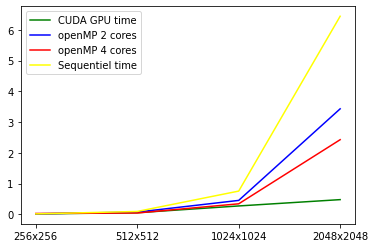

In [57]:
import numpy as np
import matplotlib.pyplot as plt

x = ["256x256", "512x512", "1024x1024", "2048x2048"]

## Les temps pour openmp et séquentiel sont prélevés du notebook executé en local avec CPU 4 coeurs ensuite sur 2 coeurs
seq = [0.012965, 0.092065, 0.754473, 6.44276]
openmp_2c = [0.015634, 0.071215, 0.451438, 3.43068]
openmp_4c = [0.026537, 0.041481, 0.340611, 2.42651]
cuda = [0.011801 ,0.051452 ,0.270875 ,0.476649]

plt.plot(x, cuda, color="green", label="CUDA GPU time")
plt.plot(x, openmp_2c, color="blue", label="openMP 2 cores")
plt.plot(x, openmp_4c, color="red", label="openMP 4 cores")
plt.plot(x, seq, color="yellow", label="Sequentiel time")

plt.legend()
plt.show()